In [1]:
import numpy as np
import pandas as pd

In [2]:
##1 data
data = pd.read_csv("player.csv")

In [5]:
sample = pd.read_csv("sample.csv")

In [7]:
sample = sample.iloc[:,1:]

In [8]:
sample

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [11]:
len(sample.loc[sample.play == 'yes',:])/len(sample)

0.6428571428571429

In [12]:
len(sample.loc[sample.play == 'no',:])/len(sample)

0.35714285714285715

In [13]:
pk_yes = np.sum(sample.play == 'yes')/len(sample)
pk_no = np.sum(sample.play=='no')/len(sample)

In [14]:
-(pk_yes*np.log2(pk_yes) + pk_no*np.log2(pk_no))

0.9402859586706311

In [19]:
def entropy(x):
    px = np.unique(x,return_counts=True)[1]/len(x)
    entropy_ = -np.sum(px*np.log2(px))
    return entropy_

In [69]:
x = np.array([1,1,1,1,3,2])

In [74]:
px = np.unique(x,return_counts=True)[1]/len(x)

In [77]:
np.sum(-px*np.log2(px))

1.2516291673878228

In [20]:
entropy(sample.play)

0.9402859586706311

In [82]:
np.unique(sample['temp'],return_counts=True)

(array(['cool', 'hot', 'mild'], dtype=object), array([4, 4, 6], dtype=int64))

In [21]:
# data = sample
# x = temp
def get_info(data,x,y):
    total = entropy(data[y])
    vals, counts = np.unique(data[x],return_counts=True)
    gain = [   for val, count in zip(vals,counts)]
    

1.8423709931771088

In [22]:
entropy([1,1,1,2,2,2,2,2])

0.954434002924965

In [56]:
# y = play
total = entropy(sample.play) 
# x = sample 독립변수 (outlook)

In [26]:
vals, counts = np.unique(sample.outlook,return_counts=True)

In [30]:
entropy(sample.loc[sample.outlook == vals[0],'play'] )
# counts[0]

-0.0

In [37]:
vals[0] , counts[0]

('overcast', 4)

In [48]:
a1 = counts[0]/len(sample)*entropy(sample.loc[sample.outlook == vals[0],'play'])

In [49]:
a2 = counts[1]/len(sample)*entropy(sample.loc[sample.outlook == vals[1],'play'])

In [50]:
a3 = counts[2]/len(sample)*entropy(sample.loc[sample.outlook == vals[2],'play'])

In [64]:
def info_gain(data,x,y):
    total = entropy(data[y])
    vals, counts = np.unique(data[x],return_counts=True)
    gain = [ count/len(data)*entropy(data.loc[data[x] == val, y]) for val, count in zip(vals,counts)]
    return total - np.sum(gain)

In [68]:
info_gain(sample,'humidity','play')

0.15183550136234159

In [83]:
entropy(sample.play)

0.9402859586706311

In [106]:
# data : sample
# 종속변수(y) : play
# 선택변수(x) : temp
# np.unique(sample.temp)
def get_gain(data,x,y):
    total_info = entropy(data[y])
    gain = []
    for val in np.unique(data[x]):
        info = data.loc[data[x] == val,y]
        count = len(info)
        px = count/len(data)
        gain.append(px*entropy(info))
    return total_info - np.sum(gain)

In [116]:
features = sample.columns[:-1]

In [120]:
aa = []
for i in features:
    aa.append(get_gain(sample,i,'play'))
features[np.argmax(aa)]

'outlook'

In [123]:
def max_gain(data,x,y):
    return x[np.argmax([get_gain(data,i,y) for i in x ])]

In [124]:
max_gain(sample,sample.columns[:-1],sample.columns[-1])

'outlook'

In [173]:
def entropy(x):
    px = np.unique(x,return_counts=True)[1]/len(x)
    entropy_ = -np.sum(px*np.log2(px))
    return entropy_

In [174]:
def get_gain(data,x,y):
    total_info = entropy(data[y])
    gain = []
    for val in np.unique(data[x]):
        info = data.loc[data[x] == val,y]
        count = len(info)
        px = count/len(data)
        gain.append(px*entropy(info))
    return total_info - np.sum(gain)

In [175]:
def max_gain(data,x,y):
    return x[np.argmax([get_gain(data,i,y) for i in x ])]

In [176]:
data = sample
x = sample.columns[:-1]
y = sample.columns[-1]
best_feature = max_gain(data,x,y)

In [133]:
best_feature
tree = {best_feature:{}}

In [232]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    tree = {best_feature:{}}
    return tree

In [177]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    columns = x[ x != best_feature]
    tree = {best_feature:{}}
    count = []
    for val in np.unique(data[best_feature]): # overcast, sunny, rainy
        sub_data = data.loc[data[best_feature] == val,:]
        count.append((val,len(sub_data)))
    return count

In [265]:
def make_tree(data,x,y):
    try:
        if np.unique(data[y]).size == 1:
            return np.unique(data[y])[0]
        best_feature = max_gain(data,x,y)
        columns = x[ x != best_feature]
        tree = {best_feature:{}}
        for val in np.unique(data[best_feature]):
            sub_data = data.loc[data[best_feature] == val,:]
            sub_tree = make_tree(sub_data,columns,y)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [284]:
def make_tree(data,x,y,parent_class=None):
    try:
        if np.unique(data[y]).size == 1:
            return np.unique(data[y])[0]
        elif len(data) == 0:
            return 'case_1'
        elif len(x) == 0:
            return parent_class
        best_feature = max_gain(data,x,y)
        columns = x[ x != best_feature]
        tree = {best_feature:{}}
        for val in np.unique(data[best_feature]):
            vals, counts = np.unique(data.loc[data[best_feature] == val,y],return_counts=True)
            parent_class = vals[np.argmax(counts)]
            sub_data = data.loc[data[best_feature] == val,:]
            sub_tree = make_tree(sub_data,columns,y,parent_class)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [289]:
from pprint import pprint

In [292]:
tree = make_tree(data,x,y)

In [314]:
data.windy = data.windy.astype(str)

In [315]:
x = data.columns[:-1]
y = data.columns[-1]
tree = make_tree(data,x,y)

In [316]:
test_data = np.array(['sunny','mind','high','Flase'])

In [299]:
pprint(tree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {False: 'yes', True: 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


In [318]:
tree['outlook'][test_data[0]]['windy'][test_data[3]]

'yes'

In [310]:
test_data

'False'

In [ ]:
tes

In [312]:
tree['outlook'][test_data[0]]['windy'][False]

'yes'

In [262]:
y

'play'

In [275]:
tree = make_tree(data,x,y)

"None of [Index(['overcast', 'overcast', 'overcast', 'overcast', 'rainy', 'rainy',\n       'rainy', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny'],\n      dtype='object')] are in the [index]"


In [247]:
make_tree(data,x,y)

('outlook', 'play')


In [170]:
make_tree(sub_data)

{'outlook': {'overcast': [('cool', 1), ('hot', 2), ('mild', 1)]}}

In [144]:
for val in np.unique(data[best_feature]):
    print(val)
vals = [val for val in np.unique(data[best_feature]) ]

overcast
rainy
sunny


In [148]:
data.loc[data[best_feature] == vals[0],:]
data.loc[data[best_feature] == vals[1],:]

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes


In [157]:
tree['outlook'] = {'overcast':{}}

In [159]:
tree['outlook']['overcast'] = 10

In [160]:
tree

{'outlook': {'overcast': 10}}

In [320]:
pprint(tree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'False': 'yes', 'True': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


In [321]:
data.play = np.random.choice(['잘함','못함'],data.play.size)
data

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,못함
1,overcast,cool,normal,True,못함
2,overcast,mild,high,True,못함
3,overcast,hot,normal,False,잘함
4,rainy,mild,high,False,못함
5,rainy,cool,normal,False,잘함
6,rainy,cool,normal,True,잘함
7,rainy,mild,normal,False,잘함
8,rainy,mild,high,True,잘함
9,sunny,hot,high,False,못함


In [322]:
data.windy.dtype

dtype('O')

In [323]:
x = data.columns[:-1]
y = data.columns[-1]

In [324]:
tree2 = make_tree(data,x,y)

In [326]:
pprint(tree)
pprint(tree2)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'False': 'yes', 'True': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}
{'outlook': {'overcast': {'temp': {'cool': '못함',
                                   'hot': {'humidity': {'high': '못함',
                                                        'normal': '잘함'}},
                                   'mild': '못함'}},
             'rainy': {'humidity': {'high': {'windy': {'False': '못함',
                                                       'True': '잘함'}},
                                    'normal': '잘함'}},
             'sunny': '못함'}}


In [328]:
test_data = np.array(['overcast','cool','high','False'])

In [329]:
tree2['outlook'][test_data[0]]['temp'][test_data[1]]

'못함'

In [331]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
model = DecisionTreeClassifier()

In [335]:
data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [336]:
le_outlook = LabelEncoder().fit(data.outlook)
le_temp = LabelEncoder().fit(data.temp)
le_humidity = LabelEncoder().fit(data.humidity)
le_windy = LabelEncoder().fit(data.windy)


In [338]:
X = np.c_[le_outlook.transform(data.outlook), 
     le_temp.transform(data.temp),
     le_humidity.transform(data.humidity),
     le_windy.transform(data.windy)]
y = data.play

In [339]:
model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
test_data = np.array(['overcast','cool','high','False'])

In [343]:
le_outlook.transform(['overcast']), le_temp.transform(['cool']), le_humidity.transform(['high']), le_windy.transform(['False'])

(array([0]), array([0]), array([0]), array([0]))

In [344]:
X.shape

(14, 4)

In [345]:
model.predict(np.array([0,0,0,0]).reshape(1,4))

array(['못함'], dtype=object)

In [346]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [347]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_missing_values_in_feature_mask',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_support_missing_values',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_comple

In [348]:
from sklearn import tree

In [349]:
dir(tree)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [350]:
from sklearn.tree import plot_tree

In [353]:
tree_model = DecisionTreeClassifier(max_depth=3)

In [354]:
tree_model.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.625, 0.875, 'x[0] <= 1.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.375, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

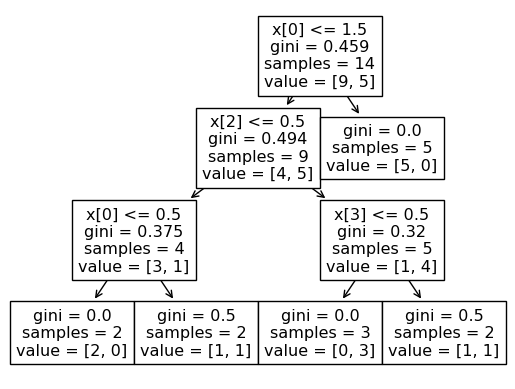

In [355]:
plot_tree(tree_model)

In [356]:
tree_model.predict(np.array([0,0,0,0]).reshape(1,4))

array(['못함'], dtype=object)

In [358]:
from sklearn.naive_bayes import GaussianNB

In [359]:
model = GaussianNB()

In [360]:
model.fit(X,y)

GaussianNB()

In [361]:
model.predict(X)

array(['못함', '잘함', '못함', '잘함', '못함', '잘함', '잘함', '잘함', '못함', '못함', '못함',
       '못함', '못함', '못함'], dtype='<U2')

In [362]:
from sklearn import naive_bayes

In [363]:
dir(naive_bayes)

['ABCMeta',
 'BaseEstimator',
 'BernoulliNB',
 'CategoricalNB',
 'ClassifierMixin',
 'ComplementNB',
 'GaussianNB',
 'Hidden',
 'Integral',
 'Interval',
 'LabelBinarizer',
 'MultinomialNB',
 'Real',
 'StrOptions',
 '_BaseDiscreteNB',
 '_BaseNB',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_partial_fit_first_call',
 '_check_sample_weight',
 '_fit_context',
 'abstractmethod',
 'binarize',
 'check_is_fitted',
 'check_non_negative',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'warnings']

In [364]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 '_validate_params',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_metadata_routing',
 'get_params'